<a href="https://colab.research.google.com/github/mikkayadu/EDA-on-Spotify-Dataset/blob/main/EDA_On_Spotify_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd


In [ ]:
import pandas as pd
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np


# **Reading Data and Exploring Shape of Data**

In [ ]:
df = pd.read_csv('spotify_dataset.csv')
df.head()
df_copy = df.copy()

In [ ]:
df.shape

(114000, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [ ]:
df.duplicated().any()

False

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df.dropna()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [ ]:
df.nunique()

track_id            89741
artists             31437
album_name          46579
track_name          73602
popularity            101
duration_ms         50697
explicit                2
danceability         1174
energy               2083
key                    12
loudness            19480
mode                    2
speechiness          1489
acousticness         5061
instrumentalness     5346
liveness             1722
valence              1790
tempo               45653
time_signature          5
track_genre           114
dtype: int64

**Changing `explicit` attribute to numerical**

In [ ]:
df = pd.get_dummies(data=df, columns=['explicit'], drop_first=True)
df.head()


,track_id,artists,album_name,track_name,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,explicit_True
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,0
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,0
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,0
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,0
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,0


Analysing Distribution of target variable(`popularity`)

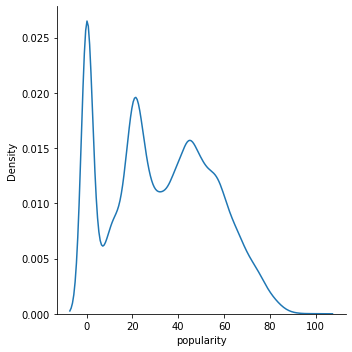

In [ ]:
sns.displot(data=df, x='popularity', kind='kde')

In [ ]:
# lis = ['speechiness', 'speechiness_log']
# col = 1

# sns.displot(data=df,
#             x='speechiness',
#             row=0,
#             col=1,
#             kind='kde',
#             )
# plt.title('Before Log transformation')

# sns.displot(data=df,
#             x='speechiness_log',
#             row=0,
#             col=0,
#             kind='kde')
# plt.title('After Log transformation')

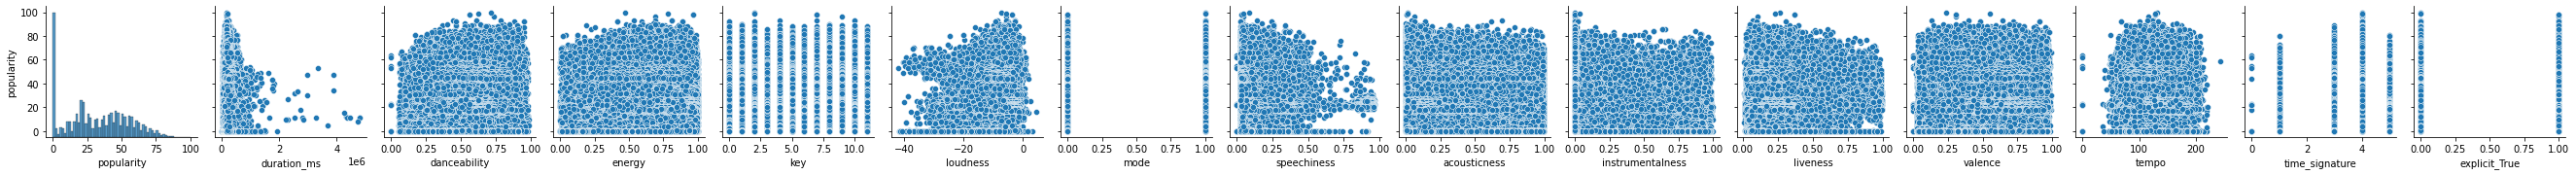

In [ ]:
sns.pairplot(data=df,
             y_vars='popularity')

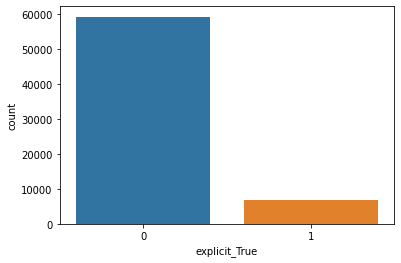

In [ ]:
sns.countplot(data=df,
              x='explicit_True')

In [ ]:
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,explicit_True
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73.0,230666.0,0.676,0.4610,1.0,-6.746,0.0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4.0,acoustic,0
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55.0,149610.0,0.420,0.1660,1.0,-17.235,1.0,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4.0,acoustic,0
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57.0,210826.0,0.438,0.3590,0.0,-9.734,1.0,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4.0,acoustic,0
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71.0,201933.0,0.266,0.0596,0.0,-18.515,1.0,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3.0,acoustic,0
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82.0,198853.0,0.618,0.4430,2.0,-9.681,1.0,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4.0,acoustic,0


In [ ]:
skew_variables = df.skew().to_frame().rename(columns={0 :'skew'})
highly_skewed = skew_variables[skew_variables['skew'] > 0.75]
lis = highly_skewed.index.to_list()
lis.append(['speechiness', 'duration_ms'])

for col in lis:
  df[col] = np.log(df[col])

<ipython-input-17-bc3e22e0bc06>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skew_variables = df.skew().to_frame().rename(columns={0 :'skew'})
/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
genre_group = df.groupby('track_genre',as_index=False).mean()[['track_genre','popularity']].sort_values('popularity', ascending=False).head(10)
genre_group

,track_genre,popularity
65,k-pop,57.549601
15,chill,53.651000
44,grunge,49.594000
55,indian,49.539000
5,anime,48.772000
33,emo,48.128000
23,deep-house,44.808000
9,brazil,44.670000
32,electronic,44.325000
4,ambient,44.191000


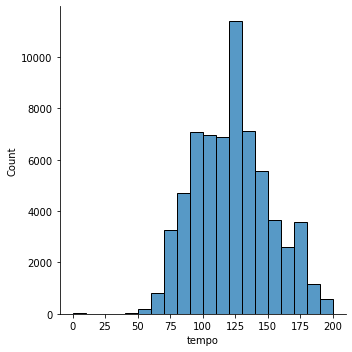

In [ ]:
sns.displot(data=df,
            x='tempo',
            kind='hist',
            bins=np.arange(0,210, 10))

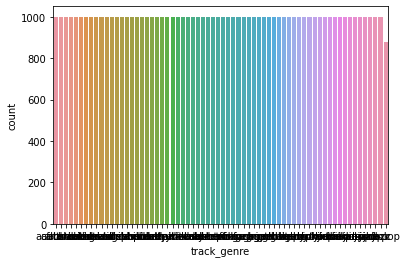

In [ ]:
sns.countplot(data=df,
              x='track_genre')

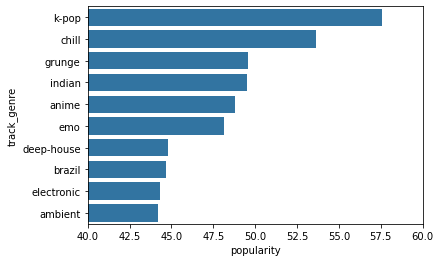

In [ ]:
plt.xlim(40,60)
sns.barplot(data=genre_group,
            y='track_genre',
            x='popularity',
            color = sns.color_palette()[0])

In [ ]:
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,explicit_True
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73.0,2.513553,0.676,0.4610,1.0,-6.746,0.0,NaN,-3.435789,-13.805560,-1.027222,0.715,87.917,4.0,acoustic,-inf
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55.0,2.477864,0.420,0.1660,1.0,-17.235,1.0,NaN,-0.079043,-12.099912,-2.292635,0.267,77.489,4.0,acoustic,-inf
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57.0,2.506243,0.438,0.3590,0.0,-9.734,1.0,NaN,-1.560648,-inf,-2.145581,0.120,76.332,4.0,acoustic,-inf
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71.0,2.502721,0.266,0.0596,0.0,-18.515,1.0,NaN,-0.099820,-9.557065,-2.024953,0.143,181.740,3.0,acoustic,-inf
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82.0,2.501462,0.618,0.4430,2.0,-9.681,1.0,NaN,-0.757153,-inf,-2.490120,0.167,119.949,4.0,acoustic,-inf


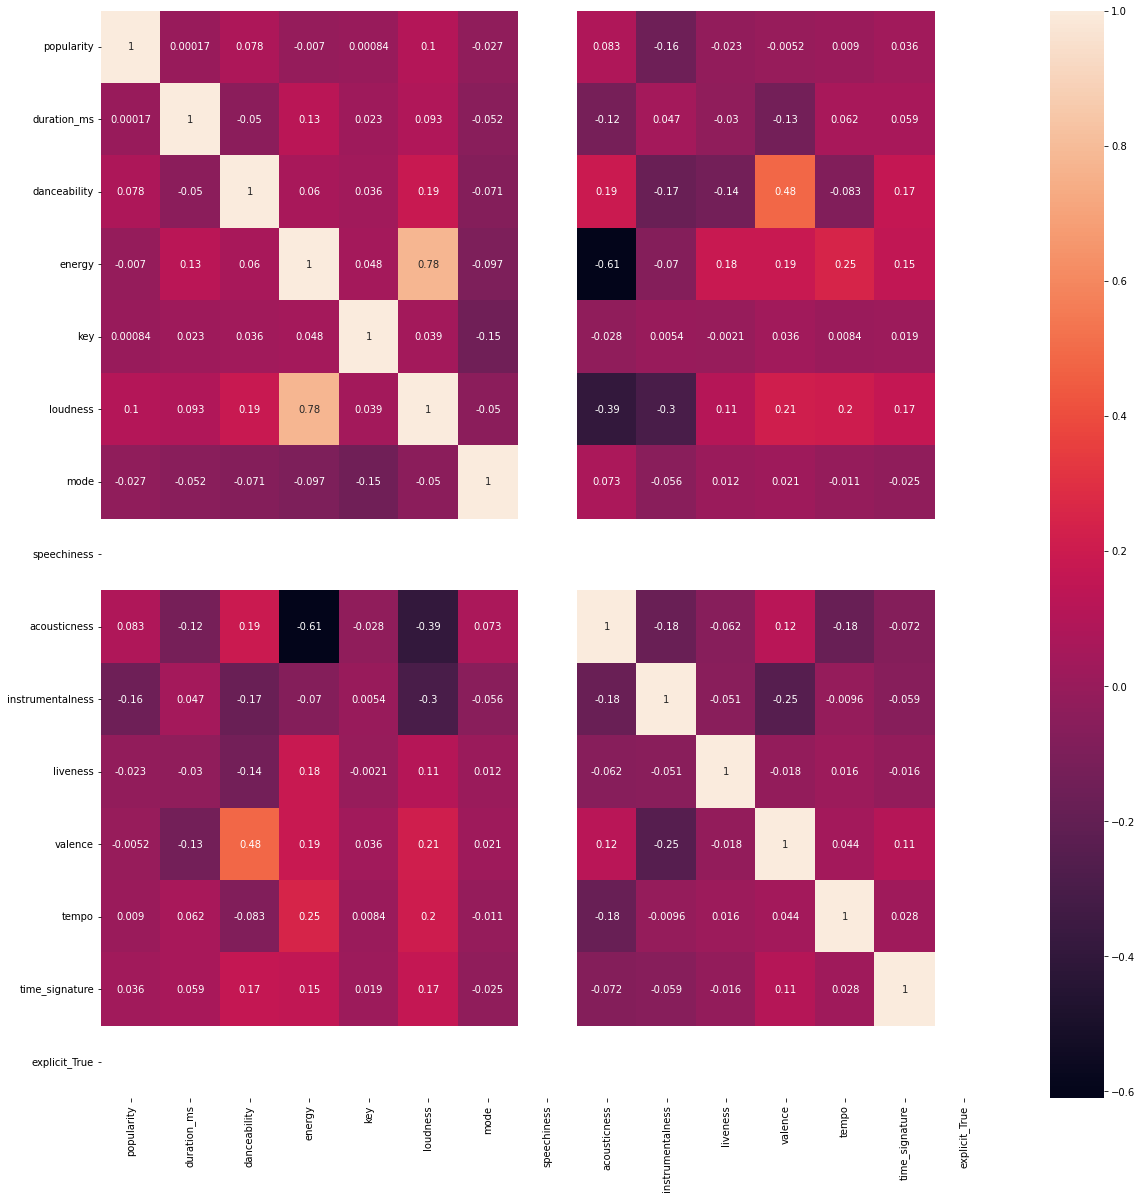

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)


,album_name,size
23229,The Complete Hank Williams,111
1574,Alternative Christmas 2022,99
15037,Metal,98
10032,Hans Zimmer: Epic Scores,88
7069,EDM Gaming Music Autumn/Winter 2022,83
15588,Mozart: A Night of Classics,83
15581,Mozart - All Day Classics,81
1986,Arbeitsmusik Herbst/Winter 2022/2023,76
16306,Night Drive Autumn/Winter 2022/23,76
23500,The Hardcore Archive Part 3 (1997),70


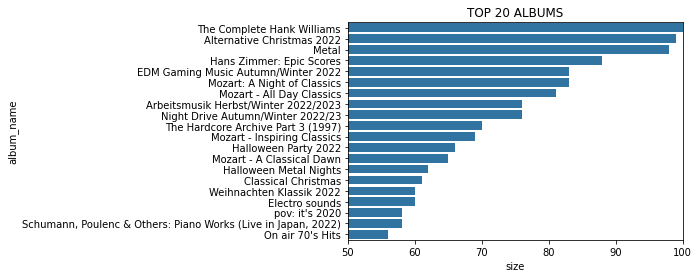

In [ ]:
plt.xlim(50,100)
top_20_albums = df.groupby(by=['album_name'], as_index=False).size().sort_values('size', ascending=False).head(20)
sns.barplot(data=top_20_albums,
            y= 'album_name',
            x='size',
            color=sns.color_palette()[0])

plt.title('TOP 20 ALBUMS')
top_20_albums

In [ ]:
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,explicit_True
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73.0,2.513553,0.676,0.4610,1.0,-6.746,0.0,NaN,-3.435789,-13.805560,-1.027222,0.715,87.917,4.0,acoustic,-inf
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55.0,2.477864,0.420,0.1660,1.0,-17.235,1.0,NaN,-0.079043,-12.099912,-2.292635,0.267,77.489,4.0,acoustic,-inf
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57.0,2.506243,0.438,0.3590,0.0,-9.734,1.0,NaN,-1.560648,-inf,-2.145581,0.120,76.332,4.0,acoustic,-inf
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71.0,2.502721,0.266,0.0596,0.0,-18.515,1.0,NaN,-0.099820,-9.557065,-2.024953,0.143,181.740,3.0,acoustic,-inf
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82.0,2.501462,0.618,0.4430,2.0,-9.681,1.0,NaN,-0.757153,-inf,-2.490120,0.167,119.949,4.0,acoustic,-inf


In [ ]:
top_20_songs = df.sort_values('popularity', ascending=False).head(20)[['track_name','artists','popularity']]
top_20_songs.head(5)

,track_name,artists,popularity
20001,Unholy (feat. Kim Petras),Sam Smith;Kim Petras,100.0
51664,"Quevedo: Bzrp Music Sessions, Vol. 52",Bizarrap;Quevedo,99.0
20008,I'm Good (Blue),David Guetta;Bebe Rexha,98.0
30003,I'm Good (Blue),David Guetta;Bebe Rexha,98.0
20000,Under The Influence,Chris Brown,96.0


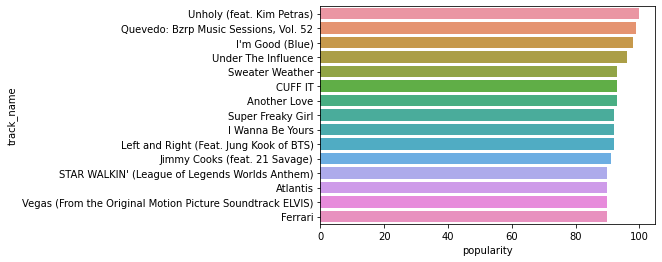

In [ ]:
sns.barplot(data=top_20_songs,
            y='track_name',
            x='popularity',

            )

In [ ]:
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,explicit_True
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73.0,2.513553,0.676,0.4610,1.0,-6.746,0.0,NaN,-3.435789,-13.805560,-1.027222,0.715,87.917,4.0,acoustic,-inf
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55.0,2.477864,0.420,0.1660,1.0,-17.235,1.0,NaN,-0.079043,-12.099912,-2.292635,0.267,77.489,4.0,acoustic,-inf
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57.0,2.506243,0.438,0.3590,0.0,-9.734,1.0,NaN,-1.560648,-inf,-2.145581,0.120,76.332,4.0,acoustic,-inf
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71.0,2.502721,0.266,0.0596,0.0,-18.515,1.0,NaN,-0.099820,-9.557065,-2.024953,0.143,181.740,3.0,acoustic,-inf
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82.0,2.501462,0.618,0.4430,2.0,-9.681,1.0,NaN,-0.757153,-inf,-2.490120,0.167,119.949,4.0,acoustic,-inf


In [ ]:
db = df_copy.sample(100)
db

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
32253,32253,6DCiGYaCeAr8diEdiCKOeE,Prabh Deep,Khat,Khat,32.0,246010.0,False,0.787,0.656,...,-10.056,0.0,0.3880,0.359000,0.000006,0.3690,0.4490,114.879,4.0,electronic
44564,44564,4le6DvrwMv2rpyN1SPeL0g,Kurt Cobain,Montage Of Heck: The Home Recordings,Sappy - Early Demo,50.0,148573.0,False,0.445,0.289,...,-19.113,0.0,0.0329,0.437000,0.006410,0.0988,0.1720,104.006,4.0,grunge
4313,4313,5PSaVasleQvJZ2mDN83Ixr,James Heather,Stories From Far Away On Piano,Biomes,59.0,162946.0,False,0.246,0.111,...,-24.418,1.0,0.0443,0.913000,0.871000,0.1100,0.1370,126.738,4.0,ambient
30724,30724,6Skh3CBum0pZw9TOr7FQnX,Gryffin;Audrey Mika,Safe With Me (with Audrey Mika),Safe With Me (with Audrey Mika),65.0,205164.0,False,0.497,0.757,...,-4.189,1.0,0.1270,0.044900,0.000000,0.1190,0.5070,169.902,4.0,edm
16467,16467,5fJD7wh9yoSTpl9d5rgl7l,Jóhann Jóhannsson,The Theory of Everything (Original Motion Pict...,The Theory of Everything,64.0,68691.0,False,0.421,0.118,...,-17.703,1.0,0.0408,0.842000,0.938000,0.1150,0.1750,104.030,4.0,classical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42304,42304,0yyDKgH3Kj9CIMMATTo34N,Fluoride,Disentanglement,Still Time,14.0,63769.0,False,0.220,0.985,...,-3.960,1.0,0.1090,0.000001,0.822000,0.3530,0.0374,96.081,1.0,grindcore
50556,50556,3iAgSpX4w5sB8EulsmewGt,Asspera,Bizarra Actitud de Seguir Con Vida,Me Gustas Mucho,22.0,170015.0,False,0.335,0.824,...,-6.648,1.0,0.0467,0.000454,0.605000,0.2990,0.1510,195.034,3.0,heavy-metal
10826,10826,6SBJmVlitZnDiI6MyAgqiL,The Chemical Brothers;Lindstrøm;Prins Thomas,Swoon,Swoon - Lindstrom & Prins Thomas Remix / Edit,11.0,336146.0,False,0.837,0.479,...,-6.764,0.0,0.0519,0.014600,0.186000,0.0626,0.7700,119.970,4.0,breakbeat
41775,41775,2xWaJjbUah2iraaiZbtmNs,Håkan Hellström,PS. lycka till i kväll,Låt oss fly precis som Gil,22.0,274825.0,False,0.440,0.712,...,-7.458,1.0,0.0318,0.256000,0.400000,0.1640,0.4610,118.835,4.0,goth


In [ ]:
db[db['duration_ms'] > 180000]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
32253,32253,6DCiGYaCeAr8diEdiCKOeE,Prabh Deep,Khat,Khat,32.0,246010.0,False,0.787,0.656,...,-10.056,0.0,0.3880,0.3590,0.000006,0.3690,0.449,114.879,4.0,electronic
30724,30724,6Skh3CBum0pZw9TOr7FQnX,Gryffin;Audrey Mika,Safe With Me (with Audrey Mika),Safe With Me (with Audrey Mika),65.0,205164.0,False,0.497,0.757,...,-4.189,1.0,0.1270,0.0449,0.000000,0.1190,0.507,169.902,4.0,edm
1231,1231,3jDxMQEuQvVjCuTdvcD6qO,Afrocidade,Afrocidade na Pista,Eu Vou no Gueto,26.0,234626.0,False,0.762,0.902,...,-4.341,0.0,0.0507,0.0256,0.000039,0.1980,0.882,133.984,4.0,afrobeat
52688,52688,1aDEvcVmHXw37fsnOL1RE9,Hank Williams,The Complete Hank Williams,Little Paper Boy,11.0,181866.0,False,0.505,0.267,...,-11.234,1.0,0.0364,0.9270,0.000002,0.1510,0.368,135.627,3.0,honky-tonk
65495,65495,1jostbOkEqtpldYbXICP7k,Anuradha Paudwal;Kumar Sanu,Ultimate Romantic Duet - Kumar Sanu & Anuradha...,Dheere Dheere Se Meri Zindagi Mein Aana (From ...,52.0,329640.0,False,0.477,0.636,...,-8.334,0.0,0.0356,0.8650,0.002260,0.2080,0.707,84.547,4.0,k-pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21342,21342,6UbWYuDxDYmYYhsNYuYPPC,Burna Boy;J Balvin,"Love, Damini",Rollercoaster (feat. J Balvin),60.0,187269.0,False,0.774,0.687,...,-9.994,1.0,0.0744,0.1160,0.001200,0.1290,0.791,98.993,4.0,dancehall
28791,28791,6omrapbrQHlG0a1fnFJqYq,The Gladiators,Sold Out (Live Tour 97-99),Roots Natty,26.0,226613.0,False,0.745,0.673,...,-7.830,1.0,0.1310,0.1320,0.000833,0.7970,0.523,82.169,4.0,dub
10826,10826,6SBJmVlitZnDiI6MyAgqiL,The Chemical Brothers;Lindstrøm;Prins Thomas,Swoon,Swoon - Lindstrom & Prins Thomas Remix / Edit,11.0,336146.0,False,0.837,0.479,...,-6.764,0.0,0.0519,0.0146,0.186000,0.0626,0.770,119.970,4.0,breakbeat
41775,41775,2xWaJjbUah2iraaiZbtmNs,Håkan Hellström,PS. lycka till i kväll,Låt oss fly precis som Gil,22.0,274825.0,False,0.440,0.712,...,-7.458,1.0,0.0318,0.2560,0.400000,0.1640,0.461,118.835,4.0,goth


In [ ]:
from scipy.stats import binom
prob = 1 - binom.cdf(71,100,0.5)
print(prob * 100)

0.000628957500836691


In [ ]:
df_copy.head(2)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73.0,230666.0,False,0.676,0.461,...,-6.746,0.0,0.1430,0.0322,0.000001,0.358,0.715,87.917,4.0,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55.0,149610.0,False,0.420,0.166,...,-17.235,1.0,0.0763,0.9240,0.000006,0.101,0.267,77.489,4.0,acoustic


In [ ]:
df.describe()

/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,explicit_True
count,65877.000000,65877.000000,65877.000000,65877.000000,65877.000000,65877.000000,65877.000000,0.0,6.587700e+04,6.587700e+04,65877.000000,65877.000000,65877.000000,65877.000000,65877.0
mean,32.604946,2.506430,0.562791,0.659978,5.321159,-8.004220,0.633059,NaN,-inf,-inf,-1.845062,0.456812,123.021380,3.914143,NaN
std,22.350686,0.032812,0.173492,0.250833,3.559885,4.902248,0.481974,NaN,NaN,NaN,0.706174,0.253608,29.470153,0.411933,NaN
min,0.000000,2.203636,0.000000,0.000020,0.000000,-42.044000,0.000000,NaN,-inf,-inf,-4.491842,0.000000,0.000000,0.000000,-inf
25%,16.000000,2.490718,0.451000,0.493000,2.000000,-9.756000,0.000000,NaN,-4.663859e+00,NaN,-2.330985,0.246000,100.027000,4.000000,NaN
50%,32.000000,2.507488,0.574000,0.708000,5.000000,-6.740000,1.000000,NaN,-2.079442e+00,-9.180782e+00,-2.032558,0.440000,122.974000,4.000000,NaN
75%,50.000000,2.524859,0.690000,0.873000,8.000000,-4.818000,1.000000,NaN,-6.198967e-01,-2.154165e+00,-1.309333,0.657000,141.036000,4.000000,NaN
max,100.000000,2.733187,0.983000,1.000000,11.000000,4.532000,1.000000,NaN,-4.008021e-03,-1.000500e-03,-0.005013,0.995000,243.372000,5.000000,0.0


Text(0.5, 1.0, 'Danceability Boxplot')

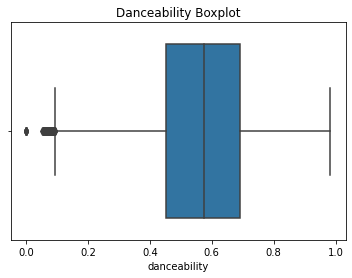

In [ ]:
sns.boxplot(data=df,
            x='danceability')
plt.title('Danceability Boxplot')

In [ ]:
top_artists =df_copy.groupby('artists').max()['popularity'].to_frame().sort_values('popularity', ascending=False).head(10)
top_artists.head(10)

<ipython-input-43-e7e63deeaaac>:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  top_artists =df_copy.groupby('artists').max()['popularity'].to_frame().sort_values('popularity', ascending=False).head(10)


,popularity
artists,
Sam Smith;Kim Petras,100.0
Bizarrap;Quevedo,99.0
David Guetta;Bebe Rexha,98.0
Chris Brown,96.0
Tom Odell,93.0
The Neighbourhood,93.0
Beyoncé,93.0
Charlie Puth;Jung Kook;BTS,92.0
Arctic Monkeys,92.0


Text(0.5, 1.0, 'TOP 10 ARTISTS')

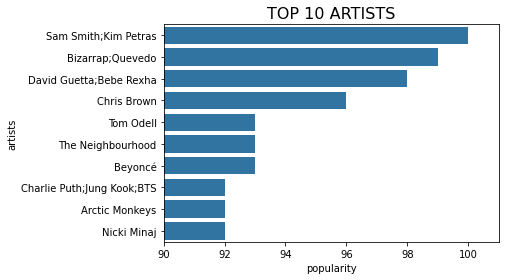

In [ ]:
plt.xlim(90,101)

sns.barplot(data=top_artists,
            x='popularity',
            y=top_artists.index,
            color = sns.color_palette()[0])

plt.title('TOP 10 ARTISTS', fontsize=16)
